In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('forestfires.csv')
dataset

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [3]:
# Mengubah penamaan kolom menjadi lower case
dataset.columns = dataset.columns.str.lower()

# Melakukan encoding pada data pada kolom "month" dan "day"
dataset.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
dataset.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [4]:
# Menampilkan tipe data pada setiap kolom dan mengecek adanya null value
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       517 non-null    int64  
 1   y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   ffmc    517 non-null    float64
 5   dmc     517 non-null    float64
 6   dc      517 non-null    float64
 7   isi     517 non-null    float64
 8   temp    517 non-null    float64
 9   rh      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


In [5]:
# Menghaspus baris dengan kolom "area" bernilai 0, yang dianggap sebagai data noise
dataset_x = dataset[dataset.area != 0]
# Menghapus kolom "x" dan "y" yang menunjukkan koordinat wilayah hutan, dimana tidak akan digunakan pada penelitian ini
dataset_x.drop(columns=['x','y'], inplace=True, axis=1)
dataset_x.head()

C:\Users\Salman Al Farisi S\AppData\Local\Temp\ipykernel_28296\1177731436.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_x.drop(columns=['x','y'], inplace=True, axis=1)


,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
138,7,2,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36
139,9,2,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43
140,9,1,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
141,8,3,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55
142,8,5,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61


In [6]:
# Menampilakan nilai korelasi yang menunjukkan pengaruh suatu variabel terhadap variabel yang lain
print("Correlation:", dataset_x.corr(method='pearson'))

Correlation:           month       day      ffmc       dmc        dc       isi      temp  \
month  1.000000 -0.066806  0.229697  0.371871  0.799946  0.122184  0.242570   
day   -0.066806  1.000000  0.075092  0.129982  0.036271  0.012677  0.053348   
ffmc   0.229697  0.075092  1.000000  0.480250  0.407638  0.704170  0.562256   
dmc    0.371871  0.129982  0.480250  1.000000  0.668926  0.329656  0.501643   
dc     0.799946  0.036271  0.407638  0.668926  1.000000  0.256826  0.495703   
isi    0.122184  0.012677  0.704170  0.329656  0.256826  1.000000  0.466027   
temp   0.242570  0.053348  0.562256  0.501643  0.495703  0.466027  1.000000   
rh    -0.145031  0.142722 -0.285990  0.027861 -0.082217 -0.148804 -0.497548   
wind  -0.052002  0.029816 -0.161384 -0.137897 -0.237593  0.072652 -0.320563   
rain   0.008284 -0.057505  0.081447  0.075206  0.036377  0.067225  0.080988   
area   0.047565  0.044566  0.054323  0.089088  0.046735  0.002121  0.110293   

             rh      wind      rain   

[Text(0, 0, 'month'),
 Text(0, 1, 'day'),
 Text(0, 2, 'ffmc'),
 Text(0, 3, 'dmc'),
 Text(0, 4, 'dc'),
 Text(0, 5, 'isi'),
 Text(0, 6, 'temp'),
 Text(0, 7, 'rh'),
 Text(0, 8, 'wind'),
 Text(0, 9, 'rain'),
 Text(0, 10, 'area')]

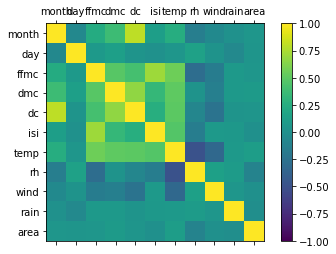

In [7]:
# # Menampilakan visualisasi yang menunjukkan pengaruh suatu variabel terhadap variabel yang lain
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset_x.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset_x.columns)
ax.set_yticklabels(dataset_x.columns)

In [8]:
# Dipilih variabel dengan korelasi diatas 0.045 terhadap variabel "area"
# Serta ditambahkan variabel area sebagai data target
clean_dataset = dataset_x[['month','ffmc','dmc','temp','rh','dc','area']]
clean_dataset.head()

,month,ffmc,dmc,temp,rh,dc,area
138,7,85.8,48.3,18.0,42,313.4,0.36
139,9,91.0,129.5,21.7,38,692.6,0.43
140,9,90.9,126.5,21.9,39,686.5,0.47
141,8,95.5,99.9,23.3,31,513.3,0.55
142,8,90.1,108.0,21.2,51,529.8,0.61


In [9]:
# Menampilkan ukuran dataset yang telah dilakukan preprocessing
clean_dataset.shape

(270, 7)

In [10]:
clean_dataset.to_csv('cleaned_forestfires1.csv')

In [11]:
dataset1 = pd.read_csv('cleaned_forestfires.csv')

In [12]:
dataset1

,Unnamed: 0,month,ffmc,dmc,temp,rh,dc,area
0,138,7,85.8,48.3,18.0,42,313.4,0.36
1,139,9,91.0,129.5,21.7,38,692.6,0.43
2,140,9,90.9,126.5,21.9,39,686.5,0.47
3,141,8,95.5,99.9,23.3,31,513.3,0.55
4,142,8,90.1,108.0,21.2,51,529.8,0.61
...,...,...,...,...,...,...,...,...
265,509,8,91.0,166.9,21.1,71,752.6,2.17
266,510,8,91.0,166.9,18.2,62,752.6,0.43
267,512,8,81.6,56.7,27.8,32,665.6,6.44
268,513,8,81.6,56.7,21.9,71,665.6,54.29


In [13]:
dataset1.drop('Unnamed: 0', axis=1, inplace=True)
# dataset1['ffmc'] = dataset1['ffmc'].fillna(0).astype(int)
# dataset1['dmc'] = dataset1['dmc'].fillna(0).astype(int)
# dataset1['temp'] = dataset1['temp'].fillna(0).astype(int)
# dataset1['dc'] = dataset1['dc'].fillna(0).astype(int)
# dataset1['area'] = dataset1['area'].fillna(0).astype(int)
# dataset1

In [14]:
from sklearn.preprocessing import LabelEncoder #One-Hot Encoding
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

In [15]:
X = dataset1.drop(['area'],axis = 1)
y = dataset1['area']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [17]:
X_train.shape, X_test.shape

((189, 6), (81, 6))

In [18]:
clf = DecisionTreeRegressor()
clf.fit(X, y)

DecisionTreeRegressor()

In [19]:
pred = clf.predict(X_test)

In [20]:
accuracy_train = clf.score(X_train, y_train)
accuracy_test  = clf.score(X_test, y_test)

In [21]:
print(f"Akurasi Model (Train) : {numpy.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {numpy.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 99.93 %
Akurasi Model (Test)  : 100.0 %


In [22]:
accuracy = explained_variance_score(y_test, pred)
print(accuracy)

0.9999864516136586


In [23]:
import joblib
joblib.dump((clf), "decision_tree.model")

['decision_tree.model']

In [24]:
df_test = pd.DataFrame(data={
    "month" : [8],
    "ffmc"  : [81.6],
    "dmc" : [56.7],
    "temp"  : [27.8],
    "rh"  : [32],
    "dc"  : [700.0]
})

df_test[0:1]

,month,ffmc,dmc,temp,rh,dc
0,8,81.6,56.7,27.8,32,700.0


In [25]:
pred_test = clf.predict(df_test[0:1])
print(numpy.round(pred_test[0],2))

6.44
